<a href="https://colab.research.google.com/github/saurabh-genai/langgraph-basic/blob/main/gcp/basic_chat_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langchain langchain-community langsmith langchain-google-genai

# **New Section**
Install all the required libraries

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from google.colab import userdata

# New Section Initiallization
Initialize LLM models

In [ ]:
## Define the state
class State(TypedDict):
  messages: Annotated[list, add_messages]

In [ ]:
## Initialize the LLM
import os
from langchain.chat_models import init_chat_model
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [ ]:
## Define chatbot
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [ ]:
graph_builder = StateGraph(State)
graph_builder.add_node("bot", chatbot)
graph_builder.add_edge(START, "bot")
graph_builder.add_edge("bot", END)
agent = graph_builder.compile()

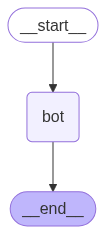

In [ ]:
from IPython.display import Image, display

try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in agent.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: Hi
Assistant: Hi there! How can I help you today?
User: What is ITC
Assistant: ITC can stand for several things, depending on the context. Here are some of the most common meanings:

**1. Information Technology Company (ITC):**

*   This is a broad term that refers to companies involved in the development, manufacturing, distribution, and services related to information technology. Examples include:
    *   Software companies (Microsoft, Adobe)
    *   Hardware manufacturers (Apple, Samsung, Dell)
    *   IT service providers (Accenture, IBM)
    *   Cloud computing providers (Amazon Web Services, Google Cloud, Microsoft Azure)

**2. Indian Tobacco Company (ITC Limited):**

*   This is a major Indian conglomerate with a diverse portfolio of businesses, including:
    *   Cigarettes
    *   FMCG (Fast-Moving Consumer Goods) - Foods, personal care, stationery, etc.
    *   Hotels
    *   Paperboards and packaging
    *   Agri-business
    *   Information Technology (ITC Infotech)

